<a href="https://colab.research.google.com/github/Belal-AI/CNN_Model_Transfer_learning/blob/main/Another_copy_of_assignment2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv('/content/dataset_mini_project_1.csv')
data

,Concentration,Frequency(GHz),S11 mag,S11 phase,S12 mag,S12 phase,S21 mag,S21 phase,S22 mag,S22 phase
0,0,1.00000,-13.305678,-170.993149,-0.789264,88.481113,-0.791416,88.446089,-13.628653,179.290361
1,0,1.01125,-13.369721,-173.078706,-0.832338,85.066860,-0.798240,84.921349,-13.740374,173.964305
2,0,1.02250,-13.393399,-174.386265,-0.851994,81.343308,-0.832650,81.353149,-13.781838,168.665225
3,0,1.03375,-13.331093,-175.779024,-0.881689,77.695625,-0.863197,77.716094,-13.846087,163.181326
4,0,1.04500,-13.302448,-176.822646,-0.911510,74.132629,-0.896796,74.147391,-13.897837,157.535016
...,...,...,...,...,...,...,...,...,...,...
4801,350,9.95500,-4.599194,-93.807358,-26.035463,145.862688,-26.465278,145.489832,-4.858199,-104.708827
4802,350,9.96625,-4.634954,-94.902602,-25.786051,143.709148,-26.380249,143.867726,-4.870900,-106.325502
4803,350,9.97750,-4.607506,-96.192233,-25.865614,141.945368,-26.392629,141.825992,-4.862742,-107.944084
4804,350,9.98875,-4.674709,-97.625868,-25.924939,139.904905,-26.271394,139.884355,-4.864315,-109.457580


In [ ]:
X=data.iloc[:,1:]
y=data['Concentration']

In [ ]:
data.drop(columns=['Concentration'],inplace=True)

In [ ]:
pd.unique(data['Concentration'])

array([  0, 200, 150, 100,  50, 350])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data['Concentration'].value_counts()

,count
Concentration,
0,801
200,801
150,801
100,801
50,801
350,801


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

scaler=MinMaxScaler()
X=scaler.fit_transform(X)
from sklearn.decomposition import PCA
# Step 2: Apply PCA
pca = PCA(n_components=9)  # Keep all components
X_pca = pca.fit_transform(X)




In [ ]:
X_pca=pd.DataFrame(X_pca,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9'])
new_Data=pd.concat([X,X_pca],axis=1)

In [ ]:
new_Data

,Frequency(GHz),S11 mag,S11 phase,S12 mag,S12 phase,S21 mag,S21 phase,S22 mag,S22 phase,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,1.00000,-13.305678,-170.993149,-0.789264,88.481113,-0.791416,88.446089,-13.628653,179.290361,0.786521,0.172742,-0.226747,0.085815,0.612321,-0.008114,0.031203,-0.000403,-0.001937
1,1.01125,-13.369721,-173.078706,-0.832338,85.066860,-0.798240,84.921349,-13.740374,173.964305,0.775385,0.169843,-0.241724,0.090533,0.605077,-0.012412,0.031773,-0.000254,-0.000929
2,1.02250,-13.393399,-174.386265,-0.851994,81.343308,-0.832650,81.353149,-13.781838,168.665225,0.763946,0.165498,-0.255860,0.093736,0.596646,-0.015454,0.031781,-0.000604,-0.001263
3,1.03375,-13.331093,-175.779024,-0.881689,77.695625,-0.863197,77.716094,-13.846087,163.181326,0.752172,0.161483,-0.270438,0.096592,0.587984,-0.018109,0.033310,-0.000702,-0.001220
4,1.04500,-13.302448,-176.822646,-0.911510,74.132629,-0.896796,74.147391,-13.897837,157.535016,0.740536,0.157468,-0.284531,0.099117,0.578434,-0.021068,0.034165,-0.000754,-0.001259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,9.95500,-4.599194,-93.807358,-26.035463,145.862688,-26.465278,145.489832,-4.858199,-104.708827,-0.680983,0.968710,0.312392,-0.105831,-0.035040,0.019522,0.003520,0.003258,-0.003050
4802,9.96625,-4.634954,-94.902602,-25.786051,143.709148,-26.380249,143.867726,-4.870900,-106.325502,-0.679778,0.963725,0.303906,-0.098965,-0.038617,0.021645,0.003353,0.002179,-0.007366
4803,9.97750,-4.607506,-96.192233,-25.865614,141.945368,-26.392629,141.825992,-4.862742,-107.944084,-0.686917,0.961554,0.297775,-0.097403,-0.039418,0.021188,0.003515,0.002712,-0.005590
4804,9.98875,-4.674709,-97.625868,-25.924939,139.904905,-26.271394,139.884355,-4.864315,-109.457580,-0.691129,0.958208,0.290593,-0.093232,-0.040610,0.021006,0.002568,0.002513,-0.000893


In [ ]:
X=new_Data
#value_map = {0:0,50: 1, 100: 2, 150: 3, 200: 4, 350: 5}
value_map = {0:0,50: 1, 100: 2, 150: 3, 200: 3, 350: 4}

y = y.map(value_map)
y

,Concentration
0,0
1,0
2,0
3,0
4,0
...,...
4801,4
4802,4
4803,4
4804,4


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
clf = RandomForestClassifier(n_estimators=500)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.579002079002079

In [ ]:
df_reduced = new_Data.drop(columns=['Frequency(GHz)'])

# Print the remaining columns
print(df_reduced.columns)


Index(['Concentration', 'S11 mag', 'S11 phase', 'S12 mag', 'S12 phase',
       'S21 mag', 'S21 phase', 'S22 mag', 'S22 phase', 'pc1', 'pc2', 'pc3',
       'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9'],
      dtype='object')


In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=2000,
              )
model=model.fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test) ##just based on the PCs

0.5644490644490644

In [ ]:
model.score(X_test,y_test)## concat Th PCs with the orignal data

0.604989604989605

In [ ]:
model.score(X_test,y_test)

0.7505197505197505

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred=model.predict(X_test)


In [ ]:
cf_matrix=confusion_matrix(y_test,y_pred) ##concate the Concentrations the near from each other

<Axes: >

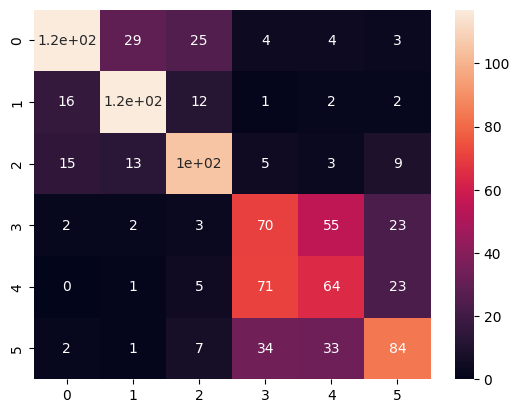

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

<Axes: >

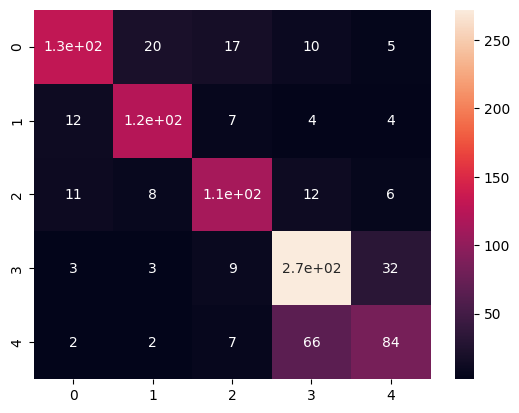

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)